# Exercise 1 — Visualizing Tail Behavior

Consider a random variable $X$with a power-law tail:

$$
p(x) = \frac{\mu x_0^\mu}{x^{1+\mu}}, \quad x \ge x_0, \quad \mu > 0
$$

**Tasks:**

1. Pick $\mu = 0.5, 1.5, 3$ and $x_0 = 1$.  
2. Plot $p(x)$ on a **log-log scale** for each value of $\mu$.  
3. Observe how the slope of the tail changes as $\mu$ increases.  
4. Discuss which values of $\mu$ produce a **finite mean** and **finite variance**.  
5. Explain physically what a “fatter tail” implies for the probability of extreme events.  

**Goal:** Develop intuition for how the exponent $\mu$ controls the thickness of the tail and the likelihood of rare events.


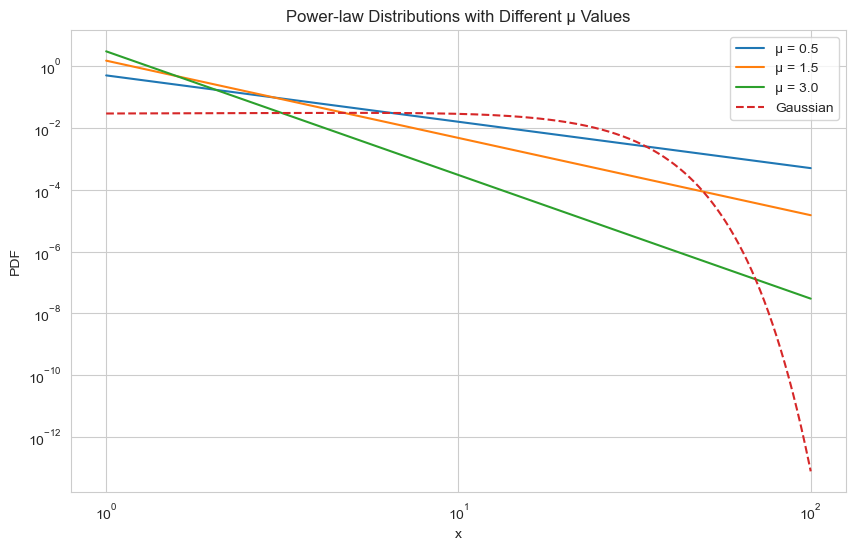

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x0 = 1
mu_values = np.array([0.5, 1.5, 3])

x_axis_values = np.linspace(x0, 100, 1000)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for mu in mu_values:
    pdf_values = mu * x0**mu / x_axis_values**(1 + mu)
    plt.plot(x_axis_values, pdf_values, label=f'μ = {mu}')

# plot gaussian for comparison
mean = 5
std_dev = 13
gaussian_values = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_axis_values - mean) / std_dev) ** 2)
plt.plot(x_axis_values, gaussian_values, label='Gaussian', linestyle='--')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Power-law Distributions with Different μ Values')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

As the exponent $\mu$ increases, the tail of the distribution becomes steeper in a log–log plot. Visually, the curve approaches a more vertical shape, which corresponds to a thinner tail. This thinning implies that the probability of extremely large events decreases more rapidly, making rare events progressively less likely as $\mu$ grows.

This behavior is directly connected to the existence of moments of the distribution. In particular, only for $\mu > 2$ does the variance become finite. When $\mu \le 2$, the integral defining the second moment diverges, signaling that fluctuations are dominated by rare but very large events rather than by typical ones.

From a physical perspective, a fat tail means that extreme events are not exponentially suppressed, unlike in a Gaussian distribution. As a result, extreme outcomes are not mere anomalies or statistical accidents, but an intrinsic feature of the system. In such regimes, a single realization can outweigh the combined contribution of many typical events, and the overall risk is governed by rare shocks rather than by small, frequent fluctuations.

# Exercise 2 — Sum of Random Variables with Fat Tails

Consider independent and identically distributed random variables $X_i$ drawn from a Pareto distribution

$$
p(x) = \frac{\mu x_0^\mu}{x^{1+\mu}}, \quad x \ge x_0
$$

with exponent $\mu > 0$ and $x_0=1$.

Define the sum of $n$ variables as

$$
S_n = \sum_{i=1}^{n} X_i .
$$

**Tasks:**

1. Fix the number of summands to $n = 100$.  
2. Study the distribution of $S_n$ for the following values of $\mu$:
   - $\mu > 2$
   - $1 < \mu < 2$
   - $\mu < 1$
3. For each case, plot the distribution of $S_n$ and analyze:
   - the shape of the central region,
   - the behavior of the tails.
4. Discuss whether the sum is dominated by:
   - many small contributions, or
   - a single large realization.

**Goal:** Understand how the exponent $\mu$ controls the applicability of the Central Limit Theorem and how extreme events influence the sum of fat-tailed random variables.


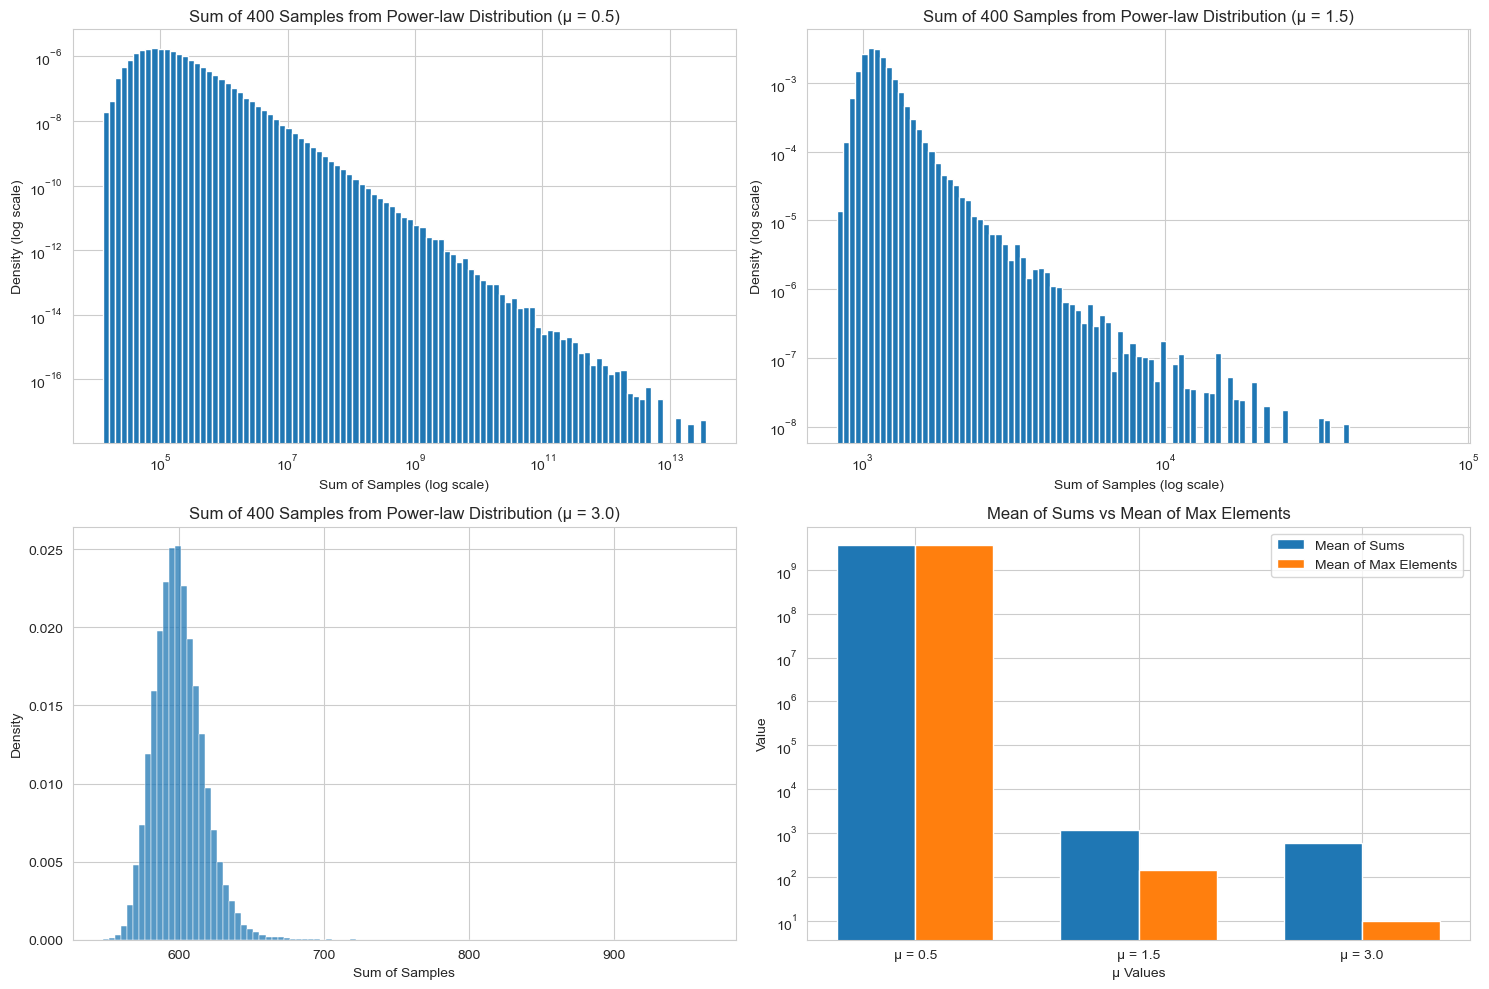

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

number_summands = 400
num_samples = 50000
x0 = 1

mu_values = np.array([0.5, 1.5, 3])
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
samples = {}
for i, mu in enumerate(mu_values, 1):
    samples[mu] = (np.random.pareto(mu, (num_samples, number_summands)) + 1) * x0
    sums = samples[mu].sum(axis=1)
    
    plt.subplot(2, 2, i)
    if mu > 2:
        sns.histplot(sums, bins=100, stat='density', kde=False)
        plt.xlabel('Sum of Samples')
        plt.ylabel('Density')
        plt.title(f'Sum of {number_summands} Samples from Power-law Distribution (μ = {mu})')
    else:
        # compute histogram with log bins
        log_bins = np.logspace(np.log10(sums.min()), np.log10(sums.max()), 100)
        plt.hist(sums, bins=log_bins, density=True)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Sum of Samples (log scale)')
        plt.ylabel('Density (log scale)')
        plt.title(f'Sum of {number_summands} Samples from Power-law Distribution (μ = {mu})')

# plot the mean value of the samples sum and the mean value for the max element in the samples for each mu
# so on the x axis put each mu and the hue is mean or max
plt.subplot(2, 2, 4)
mean_sums = [samples[mu].sum(axis=1).mean() for mu in mu_values]
max_sums = [samples[mu].max(axis=1).mean() for mu in mu_values]
x = np.arange(len(mu_values))
width = 0.35
plt.bar(x - width/2, mean_sums, width, label='Mean of Sums')
plt.bar(x + width/2, max_sums, width, label='Mean of Max Elements')
plt.xticks(x, [f'μ = {mu}' for mu in mu_values])
plt.xlabel('μ Values')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Mean of Sums vs Mean of Max Elements')
plt.legend()
plt.tight_layout()
plt.show()

For $\mu > 2$, the Pareto distribution has both a finite mean and a finite variance. As a result, the Central Limit Theorem applies. The distribution of the sum $S_n$ develops a Gaussian-like shape in its central region, as expected from the CLT. Although the tails of the distribution remain power-law at finite $n$, they are very weak and have a negligible impact on typical fluctuations. In this regime, the sum is dominated by the collective contribution of many small, independent terms.

When $1 < \mu < 2$, the second moment of the Pareto distribution diverges, violating a key assumption of the Central Limit Theorem. Consequently, the distribution of $S_n$ is no longer Gaussian, not even in the central region, and exhibits much fatter tails. This reflects a qualitative change in the nature of the sum: rare but very large realizations play a dominant role in determining its value.

For $\mu < 1$, even the mean of the distribution diverges. In this extreme regime, the sum $S_n$ is effectively governed by the largest term among the $X_i$. The distribution of $S_n$ therefore closely mirrors the distribution of the maximum, rather than arising from the accumulation of many contributions. This reflects the dominance of a single extreme event rather than collective fluctuations.


# Exercise 3 — Typical Scale of the Sum and Comparison with Scaling

Consider independent and identically distributed random variables $X_i$ drawn from a centered Student’s t distribution with $\mu > 0$ degrees of freedom,

$$
p(x) = \frac{\Gamma\!\left(\frac{\mu+1}{2}\right)}{\sqrt{\mu\pi}\,\Gamma\!\left(\frac{\mu}{2}\right)}
\left(1 + \frac{x^2}{\mu}\right)^{-\frac{\mu+1}{2}},
\qquad x \in \mathbb{R}.
$$

Define the sum and the maximum absolute value as

$$
S_n = \sum_{i=1}^{n} X_i, \qquad
$$

**Tasks:**

1. Fix several values of $n$ (e.g., $n = 20, 50, 100, 200, 500, 1000$) and generate many realizations of $S_n$ for each $n$ and for three different exponents: $\mu>2$, $1<\mu<2$, and $\mu<1$.
2. For each realization, compute the **typical scale** of the sum, defined as the median of $|S_n|$.
3. Plot the typical scale of $S_n$ versus $n$ on a log–log scale for each $\mu$.
4. Describe the plot from a **physical point of view**: explain how the slope reflects the mechanism building the sum, comparing collective contributions versus single large events.

**Goal:** Verify numerically the scaling of the typical sum for different tail exponents and connect the results to the underlying physics of accumulation versus extreme-event dominance.


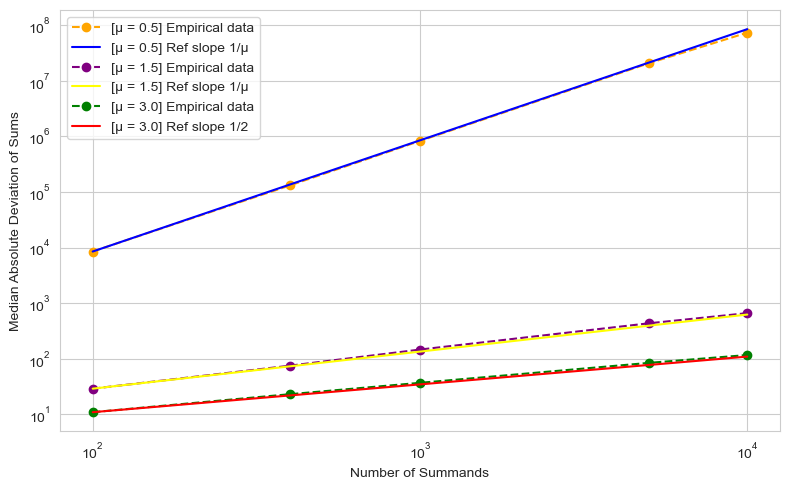

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

numbers_summands = [100, 400, 1000, 5000, 10000]
num_samples = 5000

mu_values = np.array([0.5, 1.5, 3])
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

colors = ['blue', 'yellow', 'red']
comp_colors = ['orange', 'purple', 'green']
for i, mu in enumerate(mu_values, 1):
    sums = {}
    for number_summands in numbers_summands:
        samples = t.rvs(df=mu, size=(num_samples, number_summands))
        sums[number_summands] = samples.sum(axis=1)
    
    # loglog lineplot where x is number_summands and y is the median of the absolute deviation of sums
    med_abs_dev = [np.median(np.abs(sums[n])) for n in numbers_summands]
    plt.plot(numbers_summands, med_abs_dev, linestyle='--', marker='o', label=f'[μ = {mu}] Empirical data', color=comp_colors[i-1])
    # plot power law reference line with slope 1/mu
    if mu < 2:
        ref_x = np.array(numbers_summands)
        ref_y = ref_x**(1/mu)
        plt.plot(ref_x, ref_y * med_abs_dev[0] / ref_y[0], linestyle='-', label=f'[μ = {mu}] Ref slope 1/μ', color=colors[i-1])
    else:
        ref_x = np.array(numbers_summands)
        ref_y = ref_x**0.5
        plt.plot(ref_x, ref_y * med_abs_dev[0] / ref_y[0], linestyle='-', label=f'[μ = {mu}] Ref slope 1/2', color=colors[i-1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Summands')
plt.ylabel('Median Absolute Deviation of Sums')
plt.legend()

plt.tight_layout()
plt.show()

When the scaling follows $\sqrt{n}$, fluctuations grow diffusively, indicating that the sum results from the accumulation of many independent and comparable contributions. In this case, corresponding to $\mu > 2$, the underlying distribution has finite variance and extreme events are strongly suppressed. The sum is therefore self-averaging and dominated by typical fluctuations rather than rare shocks. This is analogous to ordinary diffusion or a random walk with finite step variance.

As the tail exponent decreases and enters the regime $1 < \mu < 2$, the scaling of the typical fluctuations accelerates to $n^{1/\mu}$, growing faster than $\sqrt{n}$. This change in scaling signals a breakdown of the diffusive picture: although many small contributions are still present, the sum is increasingly influenced by rare but very large events. The variance of the distribution diverges, and the sum becomes intermittent, with its magnitude set by a small number of large jumps rather than by collective accumulation.

For $\mu < 1$, the scaling $n^{1/\mu}$ persists, but its physical meaning changes qualitatively. In this regime, even the mean of the distribution does not exist, and the sum is no longer the result of accumulation at all. Instead, it is dominated by a single extreme event whose magnitude is comparable to that of the sum itself. Adding more terms mainly increases the probability of encountering an even larger value, so the behavior of the sum closely follows that of the maximum. Overall, decreasing $\mu$ drives a transition from a collective, diffusion-like regime to an extreme-driven regime in which rare events control the system’s behavior.


# Exercise 5 — Concentration and the Herfindahl Index for Fat-Tailed Variables

Consider a set of independent and identically distributed random variables $X_i \ge 0$ drawn from a Pareto distribution

$$
p(x) = \frac{\mu x_0^\mu}{x^{1+\mu}}, \quad x \ge x_0
$$

and define the normalized weights

$$
w_i = \frac{X_i}{\sum_{j=1}^{N} X_j}.
$$

The **Herfindahl index** is defined as

$$
H_N = \sum_{i=1}^{N} w_i^2 .
$$

**Tasks:**

1. For fixed values of $N$ (e.g. $N = 50, 100, 500, 1000$) and for different tail exponents $\mu > 2$, $1 < \mu < 2$, and $\mu < 1$, generate many realizations of the set $\{X_i\}$ and compute the corresponding Herfindahl index $H_N$.
2. For $N = 1000$ plot the **probability distribution** $P(H_N)$ for each value of $\mu$ on the same figure and describe its qualitative features.
4. Compute the **expected value** $\langle H_N \rangle$ as a function of $N$ for each $\mu$ and plot it on a log–log scale.
5. Verify numerically the scaling behavior of $\langle H_N \rangle$:
   - $ \langle H_N \rangle = 1/N$ for $\mu > 2$
   - $ \langle H_N \rangle = N^{1-\mu}$ for $1 < \mu < 2$
   - $ \langle H_N \rangle = 1-\mu$ for $\mu < 1$
6. Verify numerically the scaling behavior of the typical value of $H_N$ and explain why in case of $1 < \mu < 2$ is uncompatible with $\langle H_N \rangle$:
   - $ H_N \sim O(1/N)$ for $\mu > 2$
   - $ H_N \sim N^{(2-2\mu)/\mu}$ for $1 < \mu < 2$
   - $ H_N \sim O(1)$ for $\mu < 1$

7. Provide a physical interpretation of how decreasing $\mu$ leads to increasing concentration and to the dominance of a few terms in the sum.

**Goal:** Understand how fat tails progressively destroy self-averaging and lead to concentration, even in sums of many independent variables.


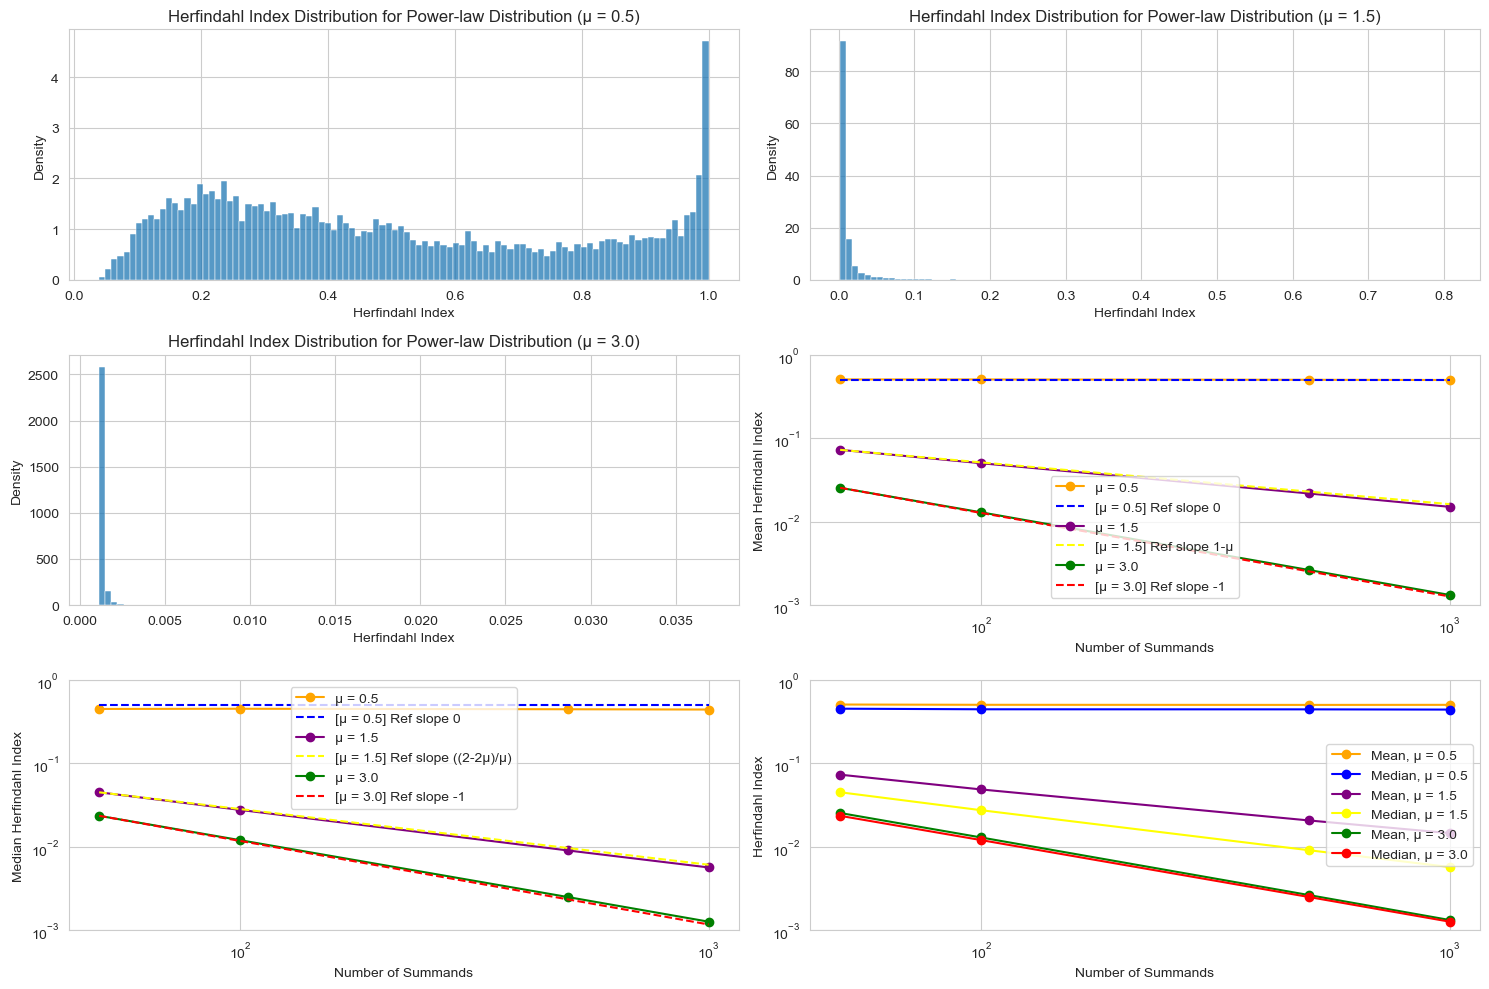

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x0 = 1
n_values = np.array([50, 100, 500, 1000])
mu_values = np.array([0.5, 1.5, 3])
num_samples = 10000

def get_herfindahl_index(realizations):
    weights = realizations / realizations.sum()
    return np.sum(weights**2)

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
for i, mu in enumerate(mu_values, 1):
    plt.subplot(3, 2, i)
    samples = (np.random.pareto(mu, (num_samples, n_values[-1])) + 1) * x0
    herfindahl_indices = np.zeros(num_samples)
    
    # compute herfindahl index for each row
    for j in range(num_samples):
        herfindahl_indices[j] = get_herfindahl_index(samples[j, :])
    sns.histplot(herfindahl_indices, bins=100, stat='density', kde=False)
    plt.xlabel('Herfindahl Index')
    plt.ylabel('Density')
    plt.title(f'Herfindahl Index Distribution for Power-law Distribution (μ = {mu})')

colors = ['blue', 'yellow', 'red']
comp_colors = ['orange', 'purple', 'green']
for i, mu in enumerate(mu_values, 1):
    plt.subplot(3, 2, 4)
    herfindahl_means = []
    for n in n_values:
        samples = (np.random.pareto(mu, (num_samples, n)) + 1) * x0
        herfindahl_indices = np.zeros(num_samples)
    
        for j in range(num_samples):
            herfindahl_indices[j] = get_herfindahl_index(samples[j, :])
        
        herfindahl_means.append(herfindahl_indices.mean())
    
    plt.plot(n_values, herfindahl_means, marker='o', label=f'μ = {mu}', color=comp_colors[i-1])

    if mu < 1:
        exp_value = 1-mu
        ref_x = np.array(n_values)
        ref_y = np.ones_like(ref_x) * exp_value
        plt.plot(ref_x, ref_y, linestyle='--', label=f'[μ = {mu}] Ref slope 0', color=colors[i-1])

    elif 1 < mu < 2:
        # plot reference line with slope 1-mu
        ref_x = np.array(n_values)
        ref_y = ref_x**(1 - mu)
        plt.plot(ref_x, ref_y * herfindahl_means[0] / ref_y[0], linestyle='--', label=f'[μ = {mu}] Ref slope 1-μ', color=colors[i-1])
    else:
        # plot reference line with slope -1
        ref_x = np.array(n_values)
        ref_x = ref_x.astype(float)
        ref_y = ref_x**-1
        plt.plot(ref_x, ref_y * herfindahl_means[0] / ref_y[0], linestyle='--', label=f'[μ = {mu}] Ref slope -1', color=colors[i-1])

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.xlabel('Number of Summands')
plt.ylabel('Mean Herfindahl Index')
plt.legend()

for i, mu in enumerate(mu_values, 1):
    plt.subplot(3, 2, 5)
    herfindahl_medians = []
    for n in n_values:
        samples = (np.random.pareto(mu, (num_samples, n)) + 1) * x0
        herfindahl_indices = np.zeros(num_samples)
    
        for j in range(num_samples):
            herfindahl_indices[j] = get_herfindahl_index(samples[j, :])
        
        herfindahl_medians.append(np.median(herfindahl_indices))
    
    plt.plot(n_values, herfindahl_medians, marker='o', label=f'μ = {mu}', color=comp_colors[i-1])

    if mu < 1:
        exp_value = 1-mu
        ref_x = np.array(n_values)
        ref_y = np.ones_like(ref_x) * exp_value
        plt.plot(ref_x, ref_y, linestyle='--', label=f'[μ = {mu}] Ref slope 0', color=colors[i-1])

    elif 1 < mu < 2:
        # plot reference line with slope 1-mu
        ref_x = np.array(n_values)
        ref_y = ref_x**((2-2*mu)/(mu))
        plt.plot(ref_x, ref_y * herfindahl_medians[0] / ref_y[0], linestyle='--', label=f'[μ = {mu}] Ref slope ((2-2μ)/μ)', color=colors[i-1])
    else:
        # plot reference line with slope -1
        ref_x = np.array(n_values)
        ref_x = ref_x.astype(float)
        ref_y = ref_x**-1
        plt.plot(ref_x, ref_y * herfindahl_medians[0] / ref_y[0], linestyle='--', label=f'[μ = {mu}] Ref slope -1', color=colors[i-1])

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.xlabel('Number of Summands')
plt.ylabel('Median Herfindahl Index')
plt.legend()

for i, mu in enumerate(mu_values, 1):
    plt.subplot(3, 2, 6)
    herfindahl_means = []
    herfindahl_medians = []
    for n in n_values:
        samples = (np.random.pareto(mu, (num_samples, n)) + 1) * x0
        herfindahl_indices = np.zeros(num_samples)
    
        for j in range(num_samples):
            herfindahl_indices[j] = get_herfindahl_index(samples[j, :])
        
        herfindahl_means.append(herfindahl_indices.mean())
        herfindahl_medians.append(np.median(herfindahl_indices))
    
    plt.plot(n_values, herfindahl_means, marker='o', label=f'Mean, μ = {mu}', color=comp_colors[i-1])
    plt.plot(n_values, herfindahl_medians, marker='o', label=f'Median, μ = {mu}', color=colors[i-1])

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1)
plt.xlabel('Number of Summands')
plt.ylabel('Herfindahl Index')
plt.legend()


plt.tight_layout()
plt.show()

The distribution of the Herfindahl index $ H_N $ for $ \mu < 1 $ reflects the fact that the sum is typically dominated by a single extreme value. This behavior is clearly visible in the strong peak near $ H_N = 1 $, indicating that almost all the weight is carried by one observation. Physically, this corresponds to a highly concentrated system in which one term overwhelms all others. As a consequence, the Herfindahl index remains of order one, $ H_N \sim O(1)$, independently of the system size $ N $.

As $ \mu $ increases, the distribution of $ H_N $ progressively shifts toward smaller values, signaling a reduction in concentration. In the intermediate regime $ 1 < \mu < 2 $, the system enters a more distributed phase, although it is not fully delocalized as in the case $ \mu > 2 $. Large values are still present and play a significant role, even though they no longer completely dominate the sum. In this regime, the typical Herfindahl index scales as
$
H_N \sim N^{(2-2\mu)/\mu}.
$
For $ \mu > 2 $, where extreme events are strongly suppressed and the Central Limit Theorem applies, one recovers the fully delocalized behavior $H_N \sim O(1/N)$.
The dependence on $ N $ is therefore strongest in the Gaussian regime $ \mu > 2 $, where the absence of large fluctuations leads to an increasingly homogeneous distribution of weights as $ N $ grows.

A key point is the comparison between the median of $ H_N $ and its expected value $ \langle H_N \rangle $ as a function of $ N $. For $ \mu > 2 $, extreme events are exceedingly rare and the system is self-averaging: the median and the mean exhibit the same scaling behavior and both decay as $ 1/N $. This reflects the robustness of the Central Limit Theorem in this regime.

The situation changes qualitatively when $ 1 < \mu < 2 $. Here, the mean of the $ X_i $ exists but their variance diverges. Extreme events are rare, yet not rare enough to be negligible. This is precisely the regime where typical behavior differs from average behavior. Rare realizations containing exceptionally large values contribute disproportionately to the average, leading to $ \langle H_N \rangle \sim N^{1-\mu}$, while the median follows the typical scaling $ N^{(2-2\mu)/\mu} $ and remains significantly smaller. Physically, this indicates a lack of self-averaging: the system is usually moderately concentrated, but occasionally exhibits very strong concentration due to rare shocks.

Finally, for $ \mu < 1 $, the mean of the $ X_i $ diverges and the system is almost always dominated by a single extreme event. Strong concentration is therefore typical rather than exceptional, and the distinction between typical and average behavior disappears. Both the median and the expected value of $ H_N $ remain of order one and do not depend on $ N $.
